# Praca domowa 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Wczytanie danych i krótkie EDA

Zbiór danych **apartaments**

In [2]:
from dalex.datasets import load_apartments
aparts = load_apartments()
aparts.head()

,m2_price,construction_year,surface,floor,no_rooms,district
1,5897,1953,25,3,1,Srodmiescie
2,1818,1992,143,9,5,Bielany
3,3643,1937,56,1,2,Praga
4,3517,1995,93,7,3,Ochota
5,3013,1992,144,6,5,Mokotow


In [3]:
aparts.describe()

,m2_price,construction_year,surface,floor,no_rooms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3487.019000,1964.823000,85.590000,5.623000,3.360000
std,906.691651,25.831511,37.874799,2.899876,1.381415
min,1607.000000,1920.000000,20.000000,1.000000,1.000000
25%,2857.000000,1943.000000,53.000000,3.000000,2.000000
50%,3386.000000,1965.000000,85.500000,6.000000,3.000000
75%,4018.250000,1988.000000,118.000000,8.000000,4.000000
max,6595.000000,2010.000000,150.000000,10.000000,6.000000


In [4]:
aparts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   m2_price           1000 non-null   int64 
 1   construction_year  1000 non-null   int64 
 2   surface            1000 non-null   int64 
 3   floor              1000 non-null   int64 
 4   no_rooms           1000 non-null   int64 
 5   district           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 54.7+ KB


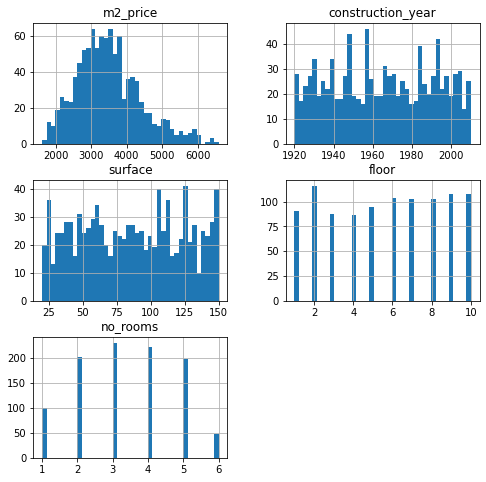

In [5]:
aparts.hist(figsize=(8, 8), bins=40)
plt.show()

In [6]:
aparts_X = aparts.drop('m2_price', axis = 1)
aparts_y = aparts.m2_price

Zbiór danych **wine recognition**

In [7]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
wine_X = wine['data']
wine_y = wine['target']

In [8]:
wine_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

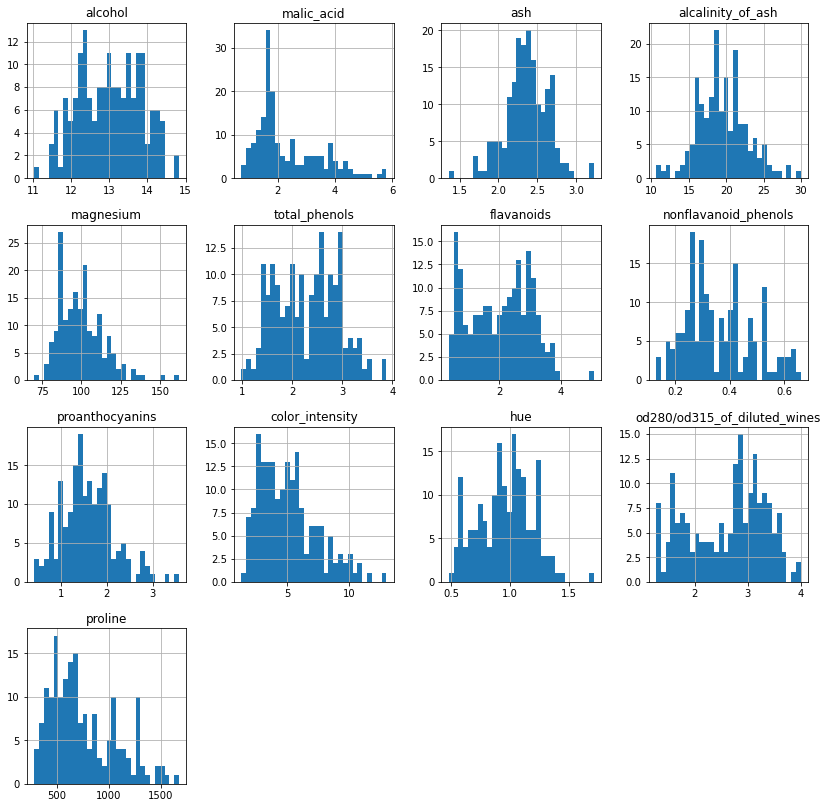

In [10]:
wine_X.hist(figsize=(14,14), bins=30)
plt.show()

### Preprocessing

In [11]:
from sklearn.model_selection import train_test_split

aparts_X_train, aparts_X_test, aparts_y_train, aparts_y_test = train_test_split(aparts_X, aparts_y, random_state = 123)
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state = 123, stratify = wine_y)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing_aparts_with_scalling = ColumnTransformer([('onehot', OneHotEncoder(), ['district'])], remainder = StandardScaler())
preprocessing_aparts = ColumnTransformer([('onehot', OneHotEncoder(), ['district'])], remainder = 'passthrough')

preprocessing_wine_with_scalling = ColumnTransformer([('scaler', StandardScaler(), wine_X_train.columns)])
preprocessing_wine = ColumnTransformer([], remainder = 'passthrough')

### Models

In [13]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

aparts_scalling = Pipeline([
    ('preprocess', preprocessing_aparts_with_scalling),
    ('model', SVR())])

aparts_no_scalling = Pipeline([
    ('preprocess', preprocessing_aparts),
    ('model', SVR())])

wine_scalling = Pipeline([
    ('preprocess', preprocessing_wine_with_scalling),
    ('model', SVC(probability = True, random_state = 123))])

wine_no_scalling = Pipeline([
    ('preprocess', preprocessing_wine),
    ('model', SVC(probability = True, random_state = 123))])

In [14]:
aparts_scalling.fit(aparts_X_train, aparts_y_train)
aparts_no_scalling.fit(aparts_X_train, aparts_y_train)

wine_scalling.fit(wine_X_train, wine_y_train)
wine_no_scalling.fit(wine_X_train, wine_y_train)

print("Finished!")

Finished!


### Results

In [15]:
def print_results(clf_scaled, clf_not_scaled, 
                  X_train, X_test, y_train, y_test,
                  dataset_name, predict_proba, metric_func, **kwargs):
    
    if predict_proba:
        y_pred_train_scaled = clf_scaled.predict_proba(X_train)
        y_pred_train_not_scaled = clf_not_scaled.predict_proba(X_train)
        y_pred_test_scaled = clf_scaled.predict_proba(X_test)
        y_pred_test_not_scaled = clf_not_scaled.predict_proba(X_test)
    else:
        y_pred_train_scaled = clf_scaled.predict(X_train)
        y_pred_train_not_scaled = clf_not_scaled.predict(X_train)
        y_pred_test_scaled = clf_scaled.predict(X_test)
        y_pred_test_not_scaled = clf_not_scaled.predict(X_test)
    
    print("Metryka: " + metric_func.__name__)
    print("Dataset: " + dataset_name)
    print("Not scaled:")
    print(f"    train score: {metric_func(y_train, y_pred_train_not_scaled, **kwargs)}")
    print(f"    test score:  {metric_func(y_test, y_pred_test_not_scaled, **kwargs)}")
    print("Scaled:")
    print(f"    train score: {metric_func(y_train, y_pred_train_scaled, **kwargs)}")
    print(f"    test score:  {metric_func(y_test, y_pred_test_scaled, **kwargs)}") 

In [16]:
def print_results_aparts(metric_func, **kwargs):
    print_results(aparts_scalling, aparts_no_scalling, aparts_X_train, aparts_X_test, aparts_y_train, aparts_y_test,
             'aparts', False, metric_func, **kwargs)

def print_results_wine(metric_func, predict_proba, **kwargs):
    print_results(wine_scalling, wine_no_scalling, wine_X_train, wine_X_test, wine_y_train, wine_y_test,
             'wine', predict_proba, metric_func, **kwargs)

#### Apartaments

In [17]:
from sklearn.metrics import mean_squared_error as mse

print_results_aparts(mse, squared = False)

Metryka: mean_squared_error
Dataset: aparts
Not scaled:
    train score: 913.3779805746185
    test score:  904.3218443134921
Scaled:
    train score: 892.3816244515872
    test score:  881.3495036958496


Zmiana nie jest zbyt duża - różnica wynosi około $2-3\%$. Jednakże, poprawienie wyniku, to zawsze poprawienie wyniku, co jest zawsze mile widziane :)

#### Wine

In [18]:
from sklearn.metrics import roc_auc_score

print_results_wine(roc_auc_score, True, multi_class = 'ovr')

Metryka: roc_auc_score
Dataset: wine
Not scaled:
    train score: 0.882184712725622
    test score:  0.9138209253024069
Scaled:
    train score: 1.0
    test score:  1.0


In [19]:
from sklearn.metrics import f1_score

print_results_wine(f1_score, False, average = 'macro')

Metryka: f1_score
Dataset: wine
Not scaled:
    train score: 0.6081471348229215
    test score:  0.6696705922512374
Scaled:
    train score: 1.0
    test score:  0.9764982373678026


Na tym zbiorze danych widać znaczącą poprawę wyników dzięki skalowaniu.

Bez skalowania miara ROC AUC dała na zbiorze testowym wynik około $0.91$, natomiast miara F1 około $0.67$. 

W tym samym czasie, dane przeskalowane dały wynik (w wymienionych metrykach) $1$ lub bardzo blisko jedynki.

Zatem faktycznie, w przypadku korzystania z modelu SVM, skalowanie danych jest bardzo ważne.

### Random Search

Parametry na podstawie artykułu https://jmlr.org/papers/volume20/18-444/18-444.pdf (Table 1)

In [20]:
params_grid = {
    'model__C' : 2 ** np.linspace(-10, 10, num = 20),
    'model__gamma' : 2 ** np.linspace(-10, 10, num = 20),
    'model__degree' : list(range(2, 5 + 1)),
    'model__kernel': ['rbf']
}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

aparts_search_scalling = RandomizedSearchCV(aparts_scalling, param_distributions = params_grid, cv = 3,
                                  scoring ='neg_root_mean_squared_error', n_iter = 200, n_jobs = -1, verbose = 2, random_state = 123)

aparts_search_no_scalling = RandomizedSearchCV(aparts_no_scalling, param_distributions = params_grid, cv = 3,
                                  scoring ='neg_root_mean_squared_error', n_iter = 200, n_jobs = -1, verbose = 2, random_state = 123)

wine_search_scalling = RandomizedSearchCV(wine_scalling, param_distributions = params_grid, cv = 3,
                                  scoring ='f1_macro', n_iter = 200, n_jobs = -1, verbose = 2, random_state = 123)
                                               
wine_search_no_scalling = RandomizedSearchCV(wine_no_scalling, param_distributions = params_grid, cv = 3,
                                  scoring ='f1_macro', n_iter = 200, n_jobs = -1, verbose = 2, random_state = 123)

aparts_search_scalling.fit(aparts_X_train, aparts_y_train)
aparts_search_no_scalling.fit(aparts_X_train, aparts_y_train)
                                               
wine_search_scalling.fit(wine_X_train, wine_y_train)
wine_search_no_scalling.fit(wine_X_train, wine_y_train)

print("Finished!")

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Fitting 3 folds for each of 200 candidates, totalling 600 fits
Fitting 3 folds for each of 200 candidates, totalling 600 fits
Fitting 3 folds for each of 200 candidates, totalling 600 fits
Finished!


### Tunning results

In [22]:
def select_params_to_print(dictionary):
    d_out = {}
    params = ['kernel', 'gamma', 'degree', 'C']
    for p in params:
        d_out[p] = dictionary.get(p)
    return d_out

print(f"Default hyperparameters for aparts scaled:     {select_params_to_print(aparts_scalling.steps[1][1].get_params())}")
print(f"Default hyperparameters for aparts not scaled: {select_params_to_print(aparts_no_scalling.steps[1][1].get_params())}")
print("")
print(f"Default hyperparameters for wine scaled:       {select_params_to_print(wine_scalling.steps[1][1].get_params())}")
print(f"Default hyperparameters for wine not scaled:   {select_params_to_print(wine_no_scalling.steps[1][1].get_params())}")

Default hyperparameters for aparts scaled:     {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1.0}
Default hyperparameters for aparts not scaled: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1.0}

Default hyperparameters for wine scaled:       {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1.0}
Default hyperparameters for wine not scaled:   {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 1.0}


In [23]:
def print_results_aparts_tunned(metric_func, **kwargs):
    print_results(aparts_search_scalling.best_estimator_, aparts_search_no_scalling.best_estimator_, aparts_X_train, aparts_X_test, aparts_y_train, aparts_y_test,
             'aparts', False, metric_func, **kwargs)

def print_results_wine_tunned(metric_func, predict_proba, **kwargs):
    print_results(wine_search_scalling.best_estimator_, wine_search_no_scalling.best_estimator_, wine_X_train, wine_X_test, wine_y_train, wine_y_test,
             'wine', predict_proba, metric_func, **kwargs)

#### Apartaments

In [24]:
print(f"Best params for aparts not scaled: {aparts_search_no_scalling.best_params_}")
print(f"Best params for aparts scaled:     {aparts_search_scalling.best_params_}")

Best params for aparts not scaled: {'model__kernel': 'rbf', 'model__gamma': 0.0020256934461839685, 'model__degree': 2, 'model__C': 1024.0}
Best params for aparts scaled:     {'model__kernel': 'rbf', 'model__gamma': 0.07779328684150147, 'model__degree': 5, 'model__C': 493.658110946557}


In [25]:
print_results_aparts_tunned(mse, squared = False)

Metryka: mean_squared_error
Dataset: aparts
Not scaled:
    train score: 682.8727207672699
    test score:  710.0423232129689
Scaled:
    train score: 169.14285474177484
    test score:  168.67407374811353


#### Wine

In [26]:
print(f"Best params for wine not scaled:   {wine_search_no_scalling.best_params_}")
print(f"Best params for wine scaled:       {wine_search_scalling.best_params_}")

Best params for wine not scaled:   {'model__kernel': 'rbf', 'model__gamma': 0.0009765625, 'model__degree': 2, 'model__C': 12.854579625070118}
Best params for wine scaled:       {'model__kernel': 'rbf', 'model__gamma': 0.03750320998681571, 'model__degree': 5, 'model__C': 0.6943255713073277}


In [27]:
print_results_wine_tunned(roc_auc_score, True, multi_class = 'ovr')

Metryka: roc_auc_score
Dataset: wine
Not scaled:
    train score: 0.9996181748759069
    test score:  0.9363761067464772
Scaled:
    train score: 1.0
    test score:  1.0


In [28]:
print_results_wine_tunned(f1_score, False, average = 'macro')

Metryka: f1_score
Dataset: wine
Not scaled:
    train score: 0.9916023723298167
    test score:  0.8220491904585341
Scaled:
    train score: 1.0
    test score:  1.0


### Podsumowanie

Tunningowanie hiperparametrów odniosło dobry efekt.

W przypadku zbioru **aparts** błąd średniokwadratowy na przeskalowanych danych spadł z około $880$ do $160$ na zbiorze testowym. Modele na nieprzeskalowanych danych również polepszyły swój wynik, jednak nie tak bardzo (z około $900$ na $710$).

W przypadku zbioru **wine** wynik uzyskany na domyślnych parametrach na przeskalowanych danych był bardzo zadowlający: miara ROC AUC dała wynik $1$, natomiast F1 około $0.98$. Po tunningowaniu, model końcowy osiagnął jeszcze lepszy wynik: w przypadku obu miar był to wynik $1.0$. W przypadku tego zbioru optymalizacja w Random Searchu odbywała się według miary F1, ponieważ ROC AUC już wcześniej osiągnął najwyższą możliwą wartość, czyli $1.0$.

Po tunningowaniu poprawiły się również parametry modeli działających na nieprzeskalowanych danych **wine**. Jednakże, w tym przypadku mogło dojść do overfittingu: wynik na zbiorze testowym ma prawie najwyższą możliwą wartość (około $0.99$), natomiast wynik na zbiorze testowym jest znacznie niższy.